In [1]:
# conda install -c conda-forge datetime tensorflow pandas matplotlib scikit-learn numpy seaborn
from datetime import datetime 
import tensorflow as tf 
from tensorflow import keras 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler 
import numpy as np 
import seaborn as sns 
import os

In [3]:
stock_folder = r'D:\DataExport'

# Symbol of stock declared
symbol = 'TCB'
# Joining the symbol with the stock folder using os.path.join
try:
    # If file exists, read the file
    file_name = os.path.join(stock_folder, symbol + '.csv')
    stock = pd.read_csv(file_name)
    print(stock.head())
except FileNotFoundError:
    # If file does not exist, print an error message
    print('File not found')
    exit()



  symbol    date     open     high      low    close     volume           RSI  \
0    TCB  180604  16.5516  16.9718  16.5516  16.5516  2811840.0 -1.000000e+10   
1    TCB  180605  16.0182  17.1335  15.5171  15.5171  1357500.0 -1.000000e+10   
2    TCB  180606  15.3555  15.5171  14.7089  14.8706  1605480.0 -1.000000e+10   
3    TCB  180607  15.2746  15.9050  15.0484  15.9050  1376540.0 -1.000000e+10   
4    TCB  180608  16.3253  17.0042  16.0828  17.0042  2008500.0 -1.000000e+10   

           MACD        Signal          MA10          MA20         MA100  \
0 -1.000000e+10 -1.000000e+10 -1.000000e+10 -1.000000e+10 -1.000000e+10   
1 -1.000000e+10 -1.000000e+10 -1.000000e+10 -1.000000e+10 -1.000000e+10   
2 -1.000000e+10 -1.000000e+10 -1.000000e+10 -1.000000e+10 -1.000000e+10   
3 -1.000000e+10 -1.000000e+10 -1.000000e+10 -1.000000e+10 -1.000000e+10   
4 -1.000000e+10 -1.000000e+10 -1.000000e+10 -1.000000e+10 -1.000000e+10   

          MA200           MFI      Ultimate  
0 -1.000000e+10 

In [4]:
# 140718 mean 2014-07-18, convert it
stock['date'] = pd.to_datetime(stock['date'], format='%y%m%d')

stock.head()

,symbol,date,open,high,low,close,volume,RSI,MACD,Signal,MA10,MA20,MA100,MA200,MFI,Ultimate
0,TCB,2018-06-04,16.5516,16.9718,16.5516,16.5516,2811840.0,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10
1,TCB,2018-06-05,16.0182,17.1335,15.5171,15.5171,1357500.0,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10
2,TCB,2018-06-06,15.3555,15.5171,14.7089,14.8706,1605480.0,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10
3,TCB,2018-06-07,15.2746,15.9050,15.0484,15.9050,1376540.0,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10
4,TCB,2018-06-08,16.3253,17.0042,16.0828,17.0042,2008500.0,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10


In [5]:
stock.shape

(1592, 16)

In [6]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1592 entries, 0 to 1591
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   symbol    1592 non-null   object        
 1   date      1592 non-null   datetime64[ns]
 2   open      1592 non-null   float64       
 3   high      1592 non-null   float64       
 4   low       1592 non-null   float64       
 5   close     1592 non-null   float64       
 6   volume    1592 non-null   float64       
 7   RSI       1592 non-null   float64       
 8   MACD      1592 non-null   float64       
 9   Signal    1592 non-null   float64       
 10  MA10      1592 non-null   float64       
 11  MA20      1592 non-null   float64       
 12  MA100     1592 non-null   float64       
 13  MA200     1592 non-null   float64       
 14  MFI       1592 non-null   float64       
 15  Ultimate  1592 non-null   float64       
dtypes: datetime64[ns](1), float64(14), object(1)
memory usage: 1

In [7]:
stock.describe()

,date,open,high,low,close,volume,RSI,MACD,Signal,MA10,MA20,MA100,MA200,MFI,Ultimate
count,1592,1592.000000,1592.000000,1592.000000,1592.000000,1.592000e+03,1.592000e+03,1.592000e+03,1.592000e+03,1.592000e+03,1.592000e+03,1.592000e+03,1.592000e+03,1.592000e+03,1.592000e+03
mean,2021-08-05 17:39:11.758793984,16.128638,16.329732,15.922817,16.119728,7.108032e+06,-8.793965e+07,-1.633166e+08,-2.198492e+08,-5.653265e+07,-1.193467e+08,-6.218593e+08,-1.250000e+09,-8.793965e+07,-1.821608e+08
min,2018-06-04 00:00:00,7.273640,7.516100,6.788730,7.225150,3.287100e+05,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10
25%,2019-12-30 18:00:00,11.637800,11.777250,11.468100,11.631750,2.103530e+06,4.205856e+01,-1.899703e-01,-2.343462e-01,1.154509e+01,1.152630e+01,1.111891e+01,1.067261e+01,4.039783e+01,4.026689e+01
50%,2021-08-04 12:00:00,14.595800,14.814000,14.401800,14.607900,4.322100e+06,5.094426e+01,2.103850e-02,2.178200e-02,1.447576e+01,1.436423e+01,1.402588e+01,1.413475e+01,5.311041e+01,4.914472e+01
75%,2023-03-10 18:00:00,20.366200,20.584400,20.087400,20.384375,9.978175e+06,6.143829e+01,2.574090e-01,2.931170e-01,2.023285e+01,2.009313e+01,1.957470e+01,1.871116e+01,6.496801e+01,5.701681e+01
max,2024-10-11 00:00:00,28.027800,28.415700,26.961000,28.124700,5.823550e+07,8.897835e+01,1.303330e+00,1.556562e+00,2.664578e+01,2.585052e+01,2.489452e+01,2.482591e+01,1.000000e+02,8.556094e+01
std,NaN,5.242149,5.300905,5.182610,5.234599,7.232720e+06,9.339226e+08,1.267874e+09,1.466803e+09,7.499893e+08,1.086262e+09,2.415688e+09,3.308228e+09,9.339226e+08,1.337740e+09


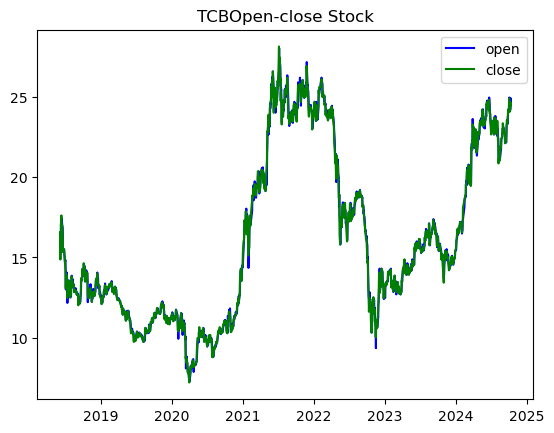

In [8]:
plt.plot(stock['date'], 
		stock['open'], 
		color="blue", 
		label="open") 
plt.plot(stock['date'], 
		stock['close'], 
		color="green", 
		label="close") 
plt.title(symbol + "Open-close Stock") 
plt.legend() 

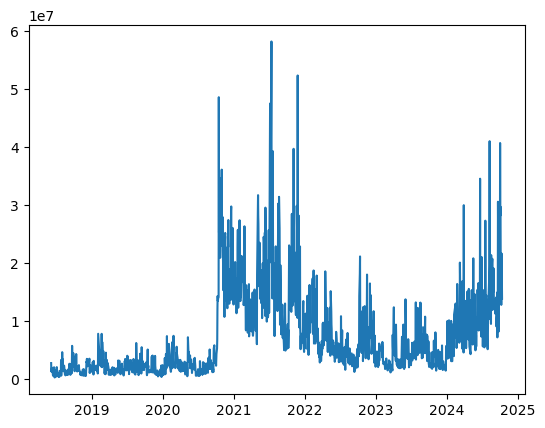

In [9]:
plt.plot(stock['date'], 
		stock['volume']) 
plt.show()


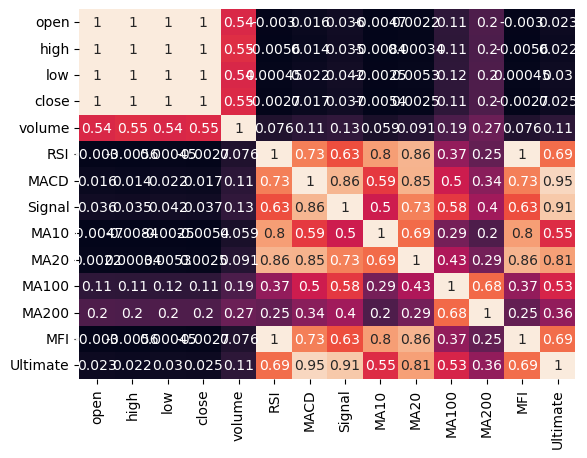

In [10]:
# sns heatmap of correlation exculded symbol and date
headmap_show = stock.drop(['symbol', 'date'], axis=1)
sns.heatmap(headmap_show.corr(), 
			annot=True, 
			cbar=False) 
plt.show() 


Text(0.5, 1.0, 'TCB Stock Prices')

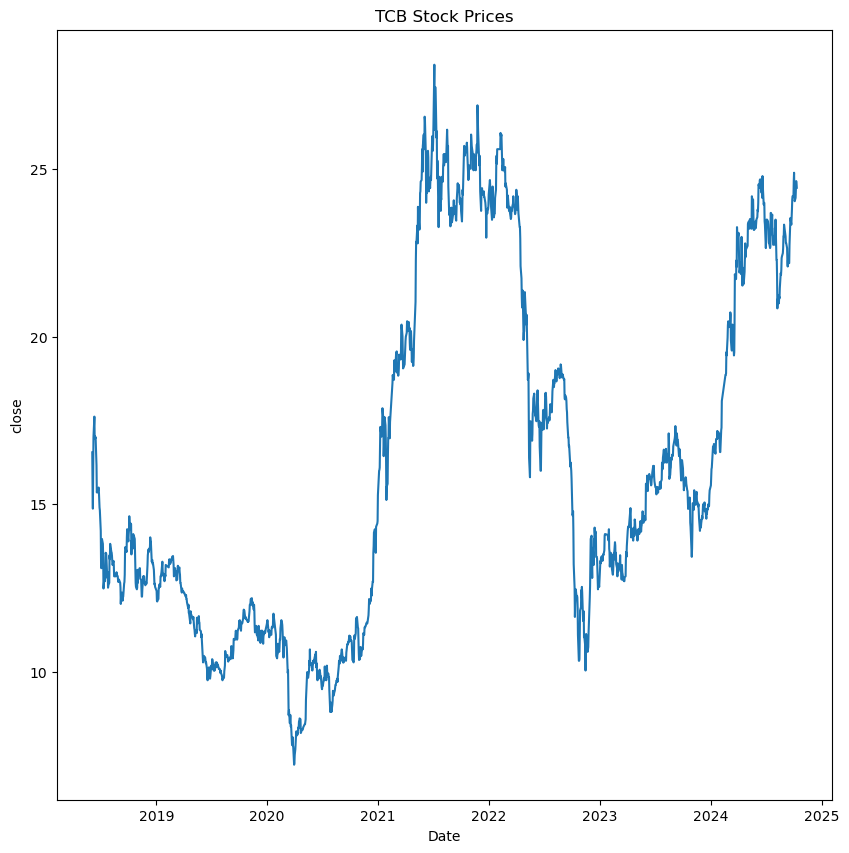

In [11]:
# close prices of Stock for the time period of 2013 to 2018 which is for a span of 5 years.

stock['date'] = pd.to_datetime(stock['date']) 
prediction = stock.loc[(stock['date']
							> datetime(2013, 1, 1)) 
							& (stock['date'] 
							< datetime(2018, 1, 1))] 

plt.figure(figsize=(10, 10)) 
plt.plot(stock['date'], stock['close']) 
plt.xlabel("Date") 
plt.ylabel("close") 
plt.title(symbol +" Stock Prices") 


In [14]:
# prepare the training set samples 
stock_close = stock.filter(['close']) 
dataset = stock_close.values 
training = int(np.ceil(len(dataset) * 0.95)) 

# scale the stock 
ss = StandardScaler() 
ss = ss.fit_transform(dataset) 

train_data = ss[0:int(training), :] 

x_train = [] 
y_train = [] 

# considering 60 as the batch size, 
# create the X_train and y_train 
for i in range(60, len(train_data)): 
	x_train.append(train_data[i-60:i, 0]) 
	y_train.append(train_data[i, 0]) 

x_train, y_train = np.array(x_train), np.array(y_train) 
X_train = np.reshape(x_train, 
					(x_train.shape[0], 
					x_train.shape[1], 1)) 


In [15]:
model = keras.models.Sequential() 
model.add(keras.layers.LSTM(units=64, 
							return_sequences=True, 
							input_shape 
							=(X_train.shape[1], 1))) 
model.add(keras.layers.LSTM(units=64)) 
model.add(keras.layers.Dense(128)) 
model.add(keras.layers.Dropout(0.5)) 
model.add(keras.layers.Dense(1)) 

print(model.summary()) 


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 64)            16896     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 58,369
Trainable params: 58,369
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
from keras.metrics import RootMeanSquaredError 
model.compile(optimizer='adam', 
			loss='mae', 
			metrics=RootMeanSquaredError()) 

history = model.fit(X_train, y_train, 
					epochs=20) 


Epoch 1/20
46/46 [==============================] - 6s 43ms/step - loss: 0.2414 - root_mean_squared_error: 0.3540
Epoch 2/20
46/46 [==============================] - 2s 43ms/step - loss: 0.1441 - root_mean_squared_error: 0.1936
Epoch 3/20
46/46 [==============================] - 2s 44ms/step - loss: 0.1232 - root_mean_squared_error: 0.1638
Epoch 4/20
46/46 [==============================] - 2s 44ms/step - loss: 0.1135 - root_mean_squared_error: 0.1552
Epoch 5/20
46/46 [==============================] - 2s 44ms/step - loss: 0.1118 - root_mean_squared_error: 0.1478
Epoch 6/20
46/46 [==============================] - 2s 51ms/step - loss: 0.1118 - root_mean_squared_error: 0.1493
Epoch 7/20
46/46 [==============================] - 2s 43ms/step - loss: 0.1054 - root_mean_squared_error: 0.1406
Epoch 8/20
46/46 [==============================] - 2s 44ms/step - loss: 0.1092 - root_mean_squared_error: 0.1452
Epoch 9/20
46/46 [==============================] - 2s 45ms/step - loss: 0.1028 - root_m

In [17]:
testing = ss[training - 60:, :] 
x_test = [] 
y_test = dataset[training:, :] 
for i in range(60, len(testing)): 
	x_test.append(testing[i-60:i, 0]) 

x_test = np.array(x_test) 
X_test = np.reshape(x_test, 
					(x_test.shape[0], 
					x_test.shape[1], 1)) 

pred = model.predict(X_test) 


3/3 [==============================] - 1s 27ms/step


C:\Users\PC\AppData\Local\Temp\ipykernel_18092\2994468135.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = pred


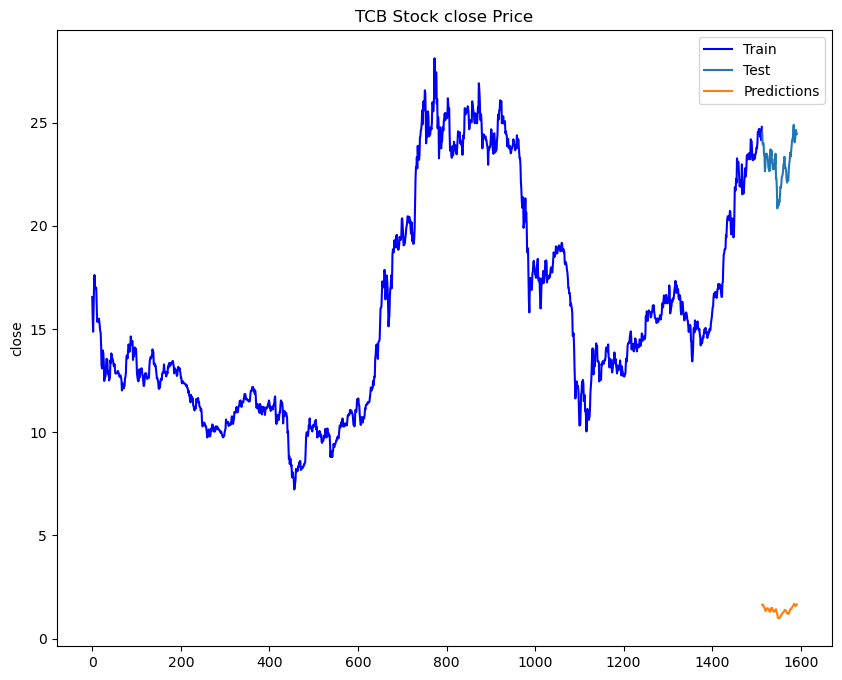

In [18]:
train = stock[:training] 
test = stock[training:] 
test['Predictions'] = pred 

plt.figure(figsize=(10, 8)) 
plt.plot(train['close'], c="b") 
plt.plot(test[['close', 'Predictions']]) 
plt.title('%s Stock close Price' % symbol) 
plt.ylabel("close") 
plt.legend(['Train', 'Test', 'Predictions']) 


In [20]:
# Calculate moving averages
stock['MA_10'] = stock['close'].rolling(window=10).mean()
stock['MA_50'] = stock['close'].rolling(window=50).mean()
# Drop NaN values
stock = stock.dropna()
# Define features and target
X = stock[['close', 'MA_10', 'MA_50']]
y = stock['close'].shift(-1).dropna()
X = X[:-1]
# Split stock into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.linear_model import LinearRegression
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)
# Make predictions
predictions = model.predict(X_test)
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 0.10559403694621453
R² Score: 0.9959895965899259


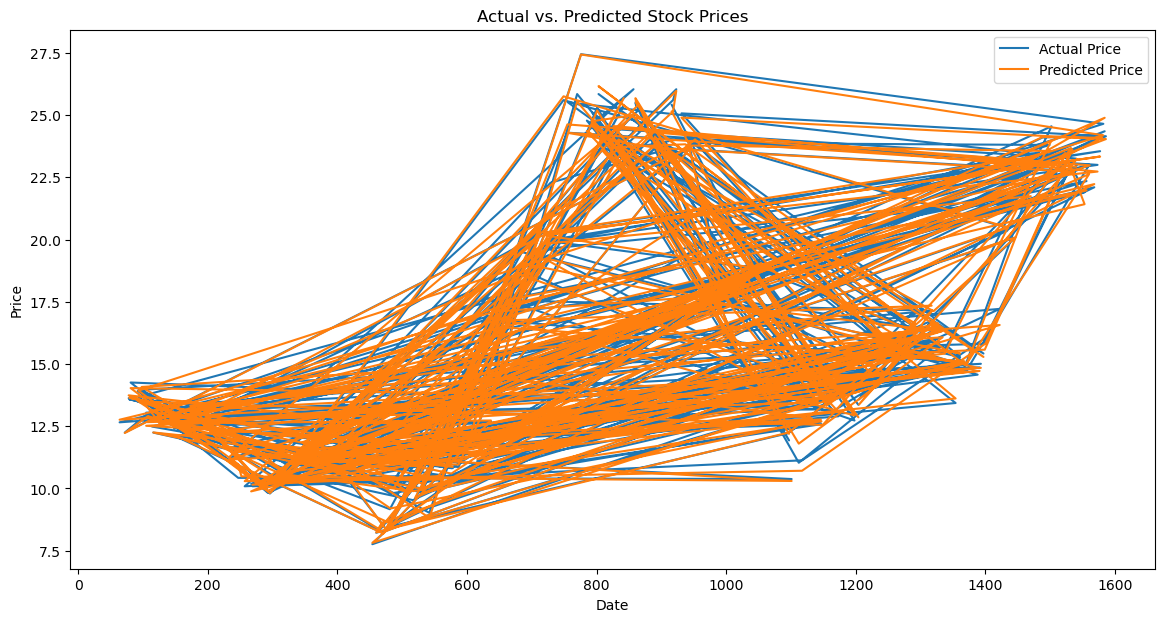

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test.values, label='Actual Price')
plt.plot(y_test.index, predictions, label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Stock Prices')
plt.legend()
plt.show()

In [23]:
initial_balance = 100000  # Starting balance in USD
balance = initial_balance
position = 0  # Number of shares

for i in range(len(X_test)):
    current_price = X_test.iloc[i]['close']
    predicted_price = predictions[i]

    if predicted_price > current_price and balance >= current_price:
        # Buy stock
        shares_to_buy = int(balance // current_price)  # Buy whole shares only
        if shares_to_buy > 100:  # Ensure we are buying at least one share
            position += shares_to_buy
            balance -= shares_to_buy * current_price
            print(f"Buying {shares_to_buy} shares at {current_price:.2f}")

    elif predicted_price < current_price and position > 0:
        # Sell stock
        balance += position * current_price
        print(f"Selling {position} shares at {current_price:.2f}")
        position = 0

# Calculate final balance including the value of the remaining shares
final_balance = balance + (position * X_test.iloc[-1]['close'])
profit = final_balance - initial_balance
print(f"Final balance: ${final_balance:.2f}")
print(f"Profit: ${profit:.2f}")



Buying 7485 shares at 13.36
Selling 7485 shares at 22.65
Buying 11296 shares at 15.01
Selling 11296 shares at 14.86
Buying 15054 shares at 11.15
Selling 15054 shares at 22.14
Buying 27822 shares at 11.98
Selling 27822 shares at 23.88
Buying 59189 shares at 11.23
Selling 59189 shares at 16.32
Buying 97394 shares at 9.92
Selling 97394 shares at 22.00
Buying 131901 shares at 16.24
Selling 131901 shares at 19.25
Buying 253582 shares at 10.01
Selling 253582 shares at 15.57
Buying 366666 shares at 10.77
Selling 366666 shares at 17.36
Buying 507802 shares at 12.53
Selling 507802 shares at 17.26
Buying 537229 shares at 16.32
Selling 537229 shares at 19.88
Buying 1048877 shares at 10.18
Selling 1048877 shares at 23.78
Buying 2991129 shares at 8.34
Selling 2991129 shares at 16.07
Buying 4590558 shares at 10.47
Selling 4590558 shares at 23.57
Buying 10726033 shares at 10.09
Selling 10726033 shares at 21.45
Buying 18354626 shares at 12.53
Selling 18354626 shares at 24.63
Buying 40104030 shares at 

In [25]:
# Print the last acutal and predicted prices
print(f"Last actual price: {y_test.iloc[-1]:.2f}")
print(f"Last predicted price: {predictions[-1]:.2f}")


Last actual price: 25.41
Last predicted price: 25.15


C:\Users\PC\AppData\Local\Temp\ipykernel_18092\2581690380.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SMA_20'] = data['close'].rolling(window=20).mean()
C:\Users\PC\AppData\Local\Temp\ipykernel_18092\2581690380.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SMA_50'] = data['close'].rolling(window=50).mean()
C:\Users\PC\AppData\Local\Temp\ipykernel_18092\2581690380.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

Mean Squared Error: 0.14223035000000298


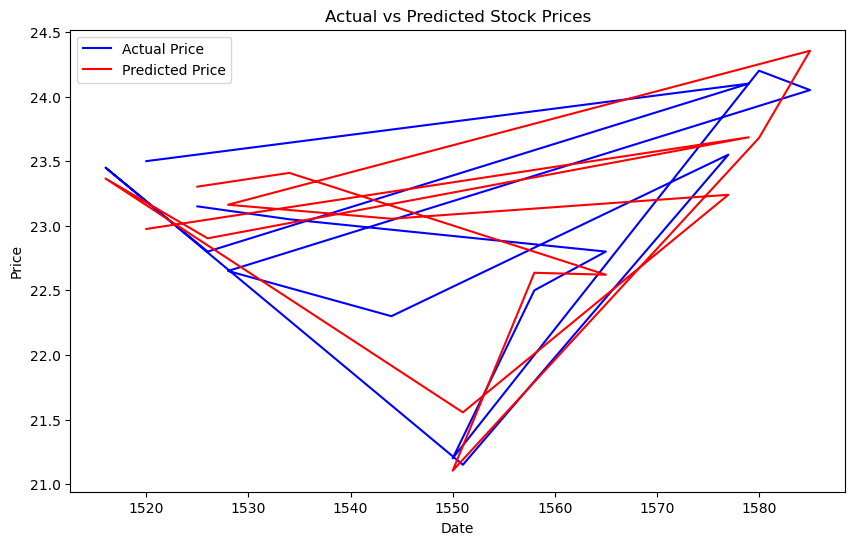

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Filter stock date from from last 6 months to now
data = stock.loc[stock['date'] > stock['date'].max() - pd.DateOffset(months=6)]

# Calculate Simple Moving Averages (SMA)
data['SMA_20'] = data['close'].rolling(window=20).mean()
data['SMA_50'] = data['close'].rolling(window=50).mean()

# Calculate Exponential Moving Averages (EMA)
data['EMA_20'] = data['close'].ewm(span=20, adjust=False).mean()

# Calculate Relative Strength Index (RSI)
delta = data['close'].diff(1)
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))

# Calculate Ulimate Index (Ultimate)


# Drop rows with NaN values (due to moving averages and RSI)
data = data.dropna()

# Define the target variable as the next day's closing price
data['Target'] = data['close'].shift(-1)

# Drop the last row, which has NaN in the 'Target' column
data = data.dropna(subset=['Target'])

# Feature set (SMA, EMA, RSI)
X = data[['SMA_20', 'SMA_50', 'EMA_20', 'RSI']]
y = data['Target']

# Split into training and testing stock
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual Price', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Price', color='red')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [27]:
# Print current stock price and current predicted price
current_price = stock.iloc[-1]['close']
current_predicted_price = model.predict([X.iloc[-1]])[0]
print(f"Current Price: {current_price:.2f}")
print(f"Current Predicted Price: {current_predicted_price:.2f}")

Current Price: 24.45
Current Predicted Price: 24.21


d:\miniconda3\envs\pyenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
